In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate
sym.init_printing(use_unicode=True)

In [48]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
def GetLaguerre(n,x,y):

    y = sym.exp(-x)*x**n
    
    poly = sym.exp(x)*sym.diff(y,x,n)/( np.math.factorial(n) )
    
    return poly

In [49]:
Pol=GetLaguerre(20,x,y)
Pol

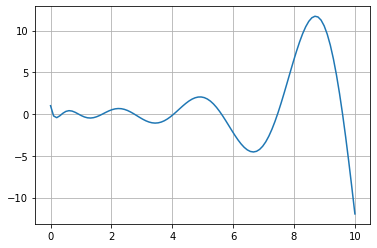

In [50]:
_x = np.linspace(0,10,100)
pn = sym.lambdify([x],Pol,'numpy')
dPol=sym.diff(Pol,x,1)
plt.plot(_x,pn(_x))
plt.grid()

In [59]:
Raices, Weights = np.polynomial.laguerre.laggauss(20)
Raices

array([ 0.07053989,  0.37212682,  0.9165821 ,  1.70730653,  2.74919926,
        4.04892531,  5.61517497,  7.45901745,  9.59439287, 12.03880255,
       14.81429344, 17.94889552, 21.47878824, 25.45170279, 29.93255463,
       35.01343424, 40.83305706, 47.61999405, 55.81079575, 66.52441653])

In [60]:
Weights

array([1.68746802e-01, 2.91254362e-01, 2.66686103e-01, 1.66002453e-01,
       7.48260647e-02, 2.49644173e-02, 6.20255084e-03, 1.14496239e-03,
       1.55741773e-04, 1.54014409e-05, 1.08648637e-06, 5.33012091e-08,
       1.75798118e-09, 3.72550240e-11, 4.76752925e-13, 3.37284424e-15,
       1.15501434e-17, 1.53952214e-20, 5.28644273e-24, 1.65645661e-28])

In [51]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [52]:
def GetRoots(f,df,x,tolerancia = 14):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if root != False:
            
            croot = np.round( root, tolerancia )
            
            if croot not in Roots:
                Roots = np.append(Roots, croot)
                
    Roots.sort()
    
    return Roots

In [53]:
def GetAllRoots(xn,Pol,dPol):
    
    poly = sym.lambdify([x],Pol,'numpy')
    Dpoly = sym.lambdify([x],dPol,'numpy')
    Roots = GetRoots(poly,Dpoly,xn)
    
    return Roots

In [54]:
xn = np.linspace(0,50,100)
Roots= GetAllRoots(xn,Pol,dPol)
Roots

array([0.07053989, 0.37212682, 0.9165821 , 1.70730653, 1.70730653,
       2.74919926])

In [55]:
def GetWeights(Roots,dPol):
    
    Dpoly = sym.lambdify([x],dPol,'numpy')
    Weights = 2/((1-Roots**2)*Dpoly(Roots)**2)
    
    return Weights

In [56]:
Pesos=GetWeights(Roots,dPol)
Pesos

array([ 0.02392581,  0.25160961,  3.05784231, -0.29601308, -0.29601308,
       -0.0627352 ])